### Question 1

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

stock_data = pd.read_csv('/Users/shreyas/Desktop/ML/HW/hw3/stock_prediction_data.csv')
stock_price = pd.read_csv('/Users/shreyas/Desktop/ML/HW/hw3/stock_price.csv')
scaler = StandardScaler()
X = scaler.fit_transform(stock_data)
y = stock_price
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f"Sklearn Linear Regression MSE: {mean_squared_error(y_test, y_pred)}")


Sklearn Linear Regression MSE: 0.04007831617401135


In [8]:
# Ensure y_train is a NumPy array
y_train = y_train.values if isinstance(y_train, pd.DataFrame) else y_train
y_train = np.ravel(y_train)  # Flatten the array

class GradientDescentLinearRegression:
    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.learning_rate = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        for _ in range(self.n_iters):
            # Prediction
            y_pred = np.dot(X, self.weights) + self.bias
            # Gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / n_samples) * np.sum(y_pred - y)
            # Update weights and bias
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
    
    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

# Fit the model
gd_model = GradientDescentLinearRegression(learning_rate=0.001, n_iters=1000)
gd_model.fit(X_train, y_train)  # Ensure X_train and y_train are correctly shaped
y_pred_gd = gd_model.predict(X_test)

# Evaluate the model
print(f"Gradient Descent MSE: {mean_squared_error(y_test, y_pred_gd)}")


Gradient Descent MSE: 8.49329046919513


In [9]:
# Closed-Form Solution
X_train_bias = np.c_[np.ones((X_train.shape[0], 1)), X_train]
X_test_bias = np.c_[np.ones((X_test.shape[0], 1)), X_test]
theta_best = np.linalg.inv(X_train_bias.T.dot(X_train_bias)).dot(X_train_bias.T).dot(y_train)

y_pred_closed_form = X_test_bias.dot(theta_best)
print(f"Closed Form Solution MSE: {mean_squared_error(y_test, y_pred_closed_form)}")


Closed Form Solution MSE: 0.040078316174012134


### Question 2

In [10]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Fit model
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train_poly)
y_pred_poly = poly_model.predict(X_test_poly)
print(f"Polynomial Regression MSE: {mean_squared_error(y_test_poly, y_pred_poly)}")


Polynomial Regression MSE: 0.052199869657269554


### Question 3

In [11]:
import numpy as np

# Given data
X = np.array([0, 1, 2, 3])
y = np.array([1, 0, 2, -2])

# Closed-form solution
X_bias = np.c_[np.ones((X.shape[0], 1)), X]
theta = np.linalg.inv(X_bias.T.dot(X_bias)).dot(X_bias.T).dot(y)

a, b = theta[1], theta[0]
print(f"Best a: {a}, Best b: {b}")


Best a: -0.7000000000000002, Best b: 1.3000000000000005


### Question 4

In [12]:
X = np.array([[0, 2], [2, -1], [-2, 1], [3, 3], [4, 1]])

def feature_map(X):
    phi_1 = X[:, 0]
    phi_2 = X[:, 1]
    phi_3 = X[:, 0] * X[:, 1]**2
    phi_4 = X[:, 0]**3
    phi_5 = X[:, 1]**2
    phi_6 = np.ones(X.shape[0])
    
    return np.c_[phi_1, phi_2, phi_3, phi_4, phi_5, phi_6]

X_transformed = feature_map(X)
print("Transformed X using feature map:")
print(X_transformed)


Transformed X using feature map:
[[ 0.  2.  0.  0.  4.  1.]
 [ 2. -1.  2.  8.  1.  1.]
 [-2.  1. -2. -8.  1.  1.]
 [ 3.  3. 27. 27.  9.  1.]
 [ 4.  1.  4. 64.  1.  1.]]


### Question 5

In [13]:
prob_table = {
    'ex': {'good': 0, 'bad': 0.1},
    'food': {'good': 0.4, 'bad': 0.1},
    'travel': {'good': 0.2, 'bad': 0.1},
    'weather': {'good': 0, 'bad': 0.1},
}

p_good_date = sum([prob_table[topic]['good'] for topic in prob_table])
p_bad_date = sum([prob_table[topic]['bad'] for topic in prob_table])

p_food_and_good = prob_table['food']['good']
p_food_or_travel = prob_table['food']['good'] + prob_table['travel']['good'] - 0

print(f"Probability of a good date: {p_good_date}")
print(f"Probability of food and good date: {p_food_and_good}")
print(f"Probability of food or travel: {p_food_or_travel}")


Probability of a good date: 0.6000000000000001
Probability of food and good date: 0.4
Probability of food or travel: 0.6000000000000001


### Question 6

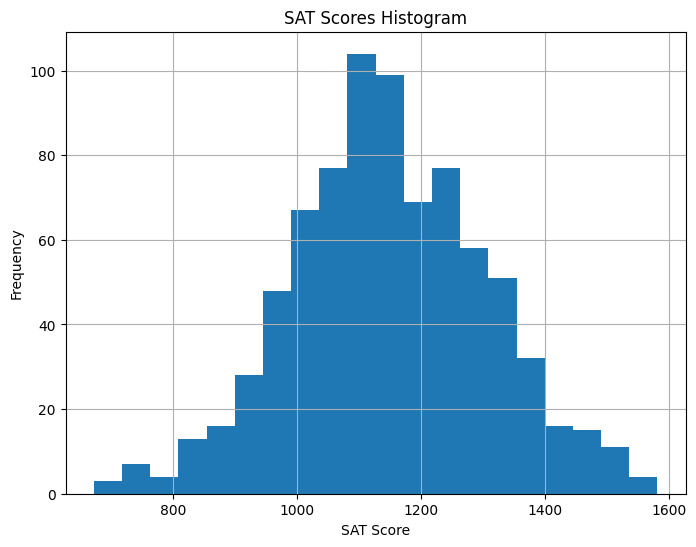

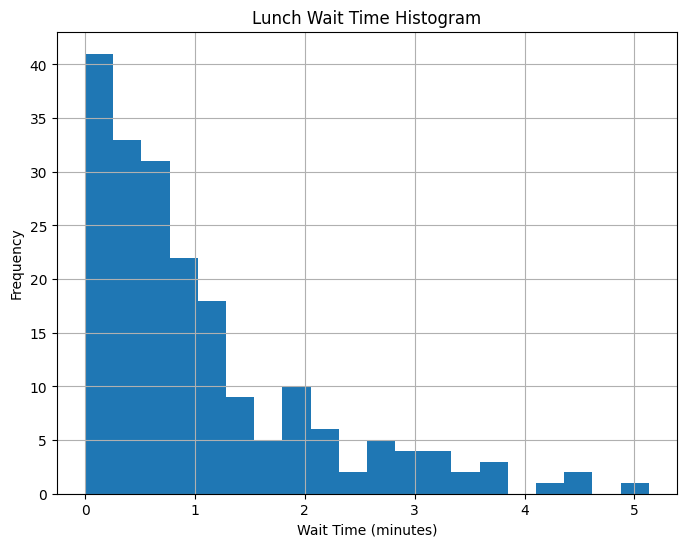

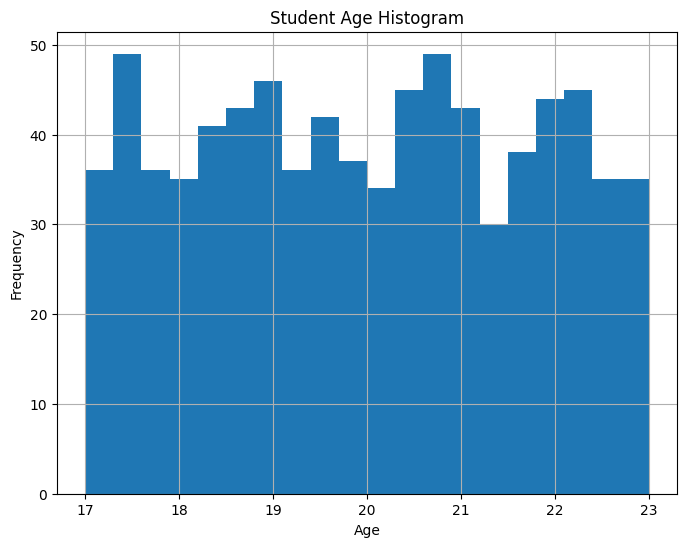

SAT Analysis:
  - Average SAT Score: 1147.8247809762204
  - Probability of scoring more than 1200: 0.3579474342928661
Lunch Wait Time Analysis:
  - Average lunch wait time: 1.0445226130653267 minutes
  - Probability of waiting more than 5 minutes: 0.005025125628140704
Student Age Analysis:
  - Average student age: 19.92828535669587 years
  - Probability of being younger than 19: 0.34167709637046306


In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# File paths
sat_file_path = '/Users/shreyas/Desktop/ML/HW/hw3/SAT (1).csv'
lunch_wait_time_file_path = '/Users/shreyas/Desktop/ML/HW/hw3/lunch_wait_time (1).csv'
student_age_file_path = '/Users/shreyas/Desktop/ML/HW/hw3/student_age (1).csv'

# Load the datasets
sat_data = pd.read_csv(sat_file_path)
lunch_data = pd.read_csv(lunch_wait_time_file_path)
student_age_data = pd.read_csv(student_age_file_path)

# 1. SAT.csv Analysis
# The column for SAT scores is '1151'
sat_avg = sat_data['1151'].mean()  # Average SAT score
p_more_than_1200 = (sat_data[sat_data['1151'] > 1200].count() / len(sat_data))['1151']  # Probability of SAT > 1200

# Generate histogram for SAT scores
plt.figure(figsize=(8, 6))
sat_data['1151'].hist(bins=20)
plt.title('SAT Scores Histogram')
plt.xlabel('SAT Score')
plt.ylabel('Frequency')
plt.show()

# 2. Lunch_wait_time.csv Analysis
# The column for lunch wait time is '0.24'
lunch_avg = lunch_data['0.24'].mean()  # Average wait time
p_wait_more_than_5 = (lunch_data[lunch_data['0.24'] > 5].count() / len(lunch_data))['0.24']  # Probability wait time > 5 minutes

# Generate histogram for Lunch wait times
plt.figure(figsize=(8, 6))
lunch_data['0.24'].hist(bins=20)
plt.title('Lunch Wait Time Histogram')
plt.xlabel('Wait Time (minutes)')
plt.ylabel('Frequency')
plt.show()

# 3. Student_age.csv Analysis
# The column for student age is '22.6'
student_age_avg = student_age_data['22.6'].mean()  # Average age
p_age_less_than_19 = (student_age_data[student_age_data['22.6'] < 19].count() / len(student_age_data))['22.6']  # Probability age < 19

# Generate histogram for Student ages
plt.figure(figsize=(8, 6))
student_age_data['22.6'].hist(bins=20)
plt.title('Student Age Histogram')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Display the results
print(f"SAT Analysis:")
print(f"  - Average SAT Score: {sat_avg}")
print(f"  - Probability of scoring more than 1200: {p_more_than_1200}")

print(f"Lunch Wait Time Analysis:")
print(f"  - Average lunch wait time: {lunch_avg} minutes")
print(f"  - Probability of waiting more than 5 minutes: {p_wait_more_than_5}")

print(f"Student Age Analysis:")
print(f"  - Average student age: {student_age_avg} years")
print(f"  - Probability of being younger than 19: {p_age_less_than_19}")


### Question 7

In [23]:
from scipy.integrate import quad
from scipy.optimize import fsolve

# Given function
def p_x(x):
    return x**2 - x + 1

# Total probability = 1
def total_probability(b):
    integral, _ = quad(p_x, 0, b)
    return integral - 1

# Solve for b
b_solution = fsolve(total_probability, 2)
print(f"Value of b: {b_solution[0]}")

# Probability between 0 and 0.3
prob_0_3, _ = quad(p_x, 0, 0.3)
print(f"Probability for 0 <= x <= 0.3: {prob_0_3}")


Value of b: 1.1536528590388855
Probability for 0 <= x <= 0.3: 0.26399999999999996


### Question 8

In [28]:
import sympy as sp

# Define symbols
n = sp.Symbol('n')
w = sp.Symbol('w')
Phi = sp.MatrixSymbol('Phi', n, n)
y = sp.MatrixSymbol('y', n, 1)

# Derivation of cost function
cost = (1/n) * (Phi*w - y).T * (Phi*w - y)

# Simplified derivative of the cost function
cost_derivative = sp.simplify(sp.diff(cost, w))
print(f"Simplified Cost Derivative: {cost_derivative}")


Simplified Cost Derivative: 1/n*(w*Phi.T - y.T)*Phi + 1/n*Phi.T*(w*Phi - y)
